<a href="https://colab.research.google.com/github/AngelTroncoso/Agentes_Gratis/blob/main/chat_memory_mas_implementacion_de_memoria_en_cadenas_dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

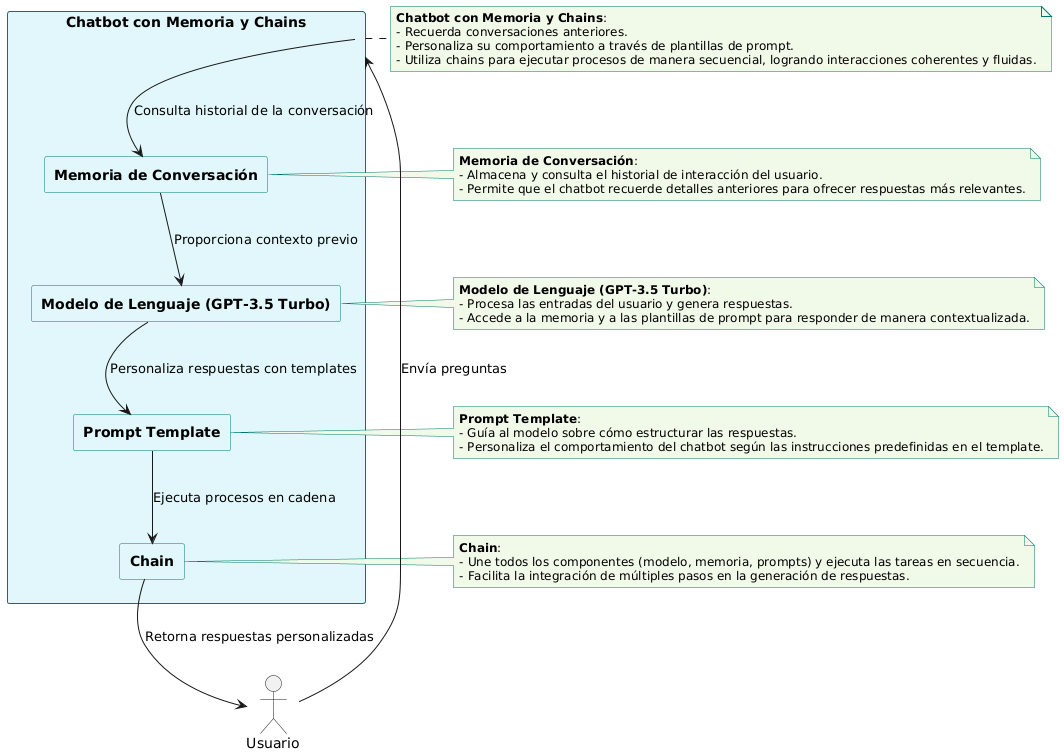

Chatbot con Memoria y Chains:  
El chatbot combina varias herramientas para ofrecer respuestas contextuales y personalizadas. Utiliza memoria para recordar las interacciones anteriores, prompt templates para guiar sus respuestas, y chains para unir los procesos de manera fluida.  
Modelo de Lenguaje (GPT-3.5 Turbo):  
Es el motor que procesa las preguntas del usuario y genera respuestas. Trabaja en conjunto con la memoria para tener acceso a las interacciones previas y utiliza prompt templates para ajustar su comportamiento.  
Memoria de Conversación:  
Almacena y consulta el historial de la conversación para que el chatbot recuerde detalles previos, como el nombre del usuario o temas discutidos en interacciones anteriores. Esto permite respuestas más coherentes a lo largo de la conversación.  
Prompt Template:  
Utiliza plantillas que guían al modelo sobre cómo responder. Por ejemplo, puede incluir instrucciones para que el chatbot sea más formal, o que responda de manera útil y educada.  
Chain:  
Integra los diferentes componentes, ejecutando los procesos secuencialmente. Permite que el chatbot acceda a la memoria, utilice el prompt template, y genere una respuesta, todo en una cadena unificada.  
Flujo de Interacción:  
El usuario envía una pregunta al chatbot.  
El chatbot consulta la memoria para obtener contexto.  
El modelo de lenguaje genera una respuesta utilizando un prompt template para guiar la respuesta.  
Finalmente, el chain ejecuta todo el proceso y devuelve la respuesta al usuario.

# Chat Memory

In [ ]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

In [ ]:
!pip install langchain_openai langchain

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

model = ChatOpenAI(model="gpt-3.5-turbo")

In [ ]:
model.invoke([HumanMessage(content='Hi! my name is bob')]).content

In [ ]:
model.invoke([HumanMessage(content='What is my name?')]).content

In [ ]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm Bob"),
        AIMessage(content="Hello Bob! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
).content

In [ ]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

In [ ]:
store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id] = InMemoryChatMessageHistory()
  return store[session_id]

In [ ]:
with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [ ]:
config = {'configurable': {'session_id': 'abc2'}}

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
     config=config
)

In [ ]:
response.content

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)

In [ ]:
response.content

In [ ]:
store

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='How are you?')],
     config=config
)

In [ ]:
store

In [ ]:
config = {'configurable': {'session_id': 'abc3'}}

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)
response

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Carli')],
     config=config
)
response.content

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)
response

In [ ]:
store

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', 'You are a helpful assistant. Answer all question to the best of your abity.'
        ),
        MessagesPlaceholder(variable_name='messages')

    ]
)

In [ ]:
chain  = prompt | model

In [ ]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='Hi! I am Bob')]
    }
)
response.content

In [ ]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='What is your name?')]
    }
)
response.content

In [ ]:
with_message_history = RunnableWithMessageHistory(chain,get_session_history)

In [ ]:
config = { 'configurable': {'session_id': 'abc5'}}

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is your name?')],
    config=config
)
response.content

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config=config
)
response.content

Resumen  
LangChain ofrece herramientas poderosas para construir asistentes conversacionales que pueden recordar el contexto, personalizar sus respuestas y manejar múltiples usuarios. En este material de apoyo, explicaremos algunos de los conceptos clave y cómo integrarlos.  

1. Prompt Templates  
Un Prompt Template en LangChain es una plantilla que define el comportamiento del asistente, proporcionando instrucciones sobre cómo debe responder el modelo. Los prompt templates permiten adaptar las respuestas a diferentes escenarios y roles, haciendo al asistente más flexible y contextual.

¿Por qué usar Prompt Templates?  
Los modelos de lenguaje son capaces de generar respuestas creativas, pero necesitan instrucciones claras para mantener consistencia y relevancia. Un prompt bien estructurado puede establecer un tono formal o casual, delimitar el alcance de las respuestas, o enfocar la conversación en un tema específico.

Ejemplo:  

"Eres un asistente útil que responde a todas las preguntas de la mejor manera posible."  
Esto permite que el asistente siempre actúe en función de las instrucciones que le damos, independientemente del flujo de la conversación.  

2. Memoria Conversacional  
El uso de memoria permite que el chatbot recuerde interacciones previas, como nombres, temas discutidos o preguntas específicas. La memoria se gestiona mediante historial de chat (Chat History) y es esencial para mantener el contexto de conversaciones prolongadas o multi-turno.  

Memoria por Session ID: Cada usuario o conversación se identifica con un session ID único, lo que permite almacenar y recuperar el historial de cada interacción. Esto es útil en sistemas que manejan múltiples usuarios o sesiones simultáneas, garantizando que cada conversación sea independiente y continúe de manera coherente.  

¿Cómo funciona?  
Cada vez que un usuario interactúa con el asistente, su mensaje (humanMessage) se guarda en el historial, junto con la respuesta generada por el modelo (AI Message). Este historial es accesible para futuras interacciones, lo que permite respuestas personalizadas basadas en la información previa.

3. Chains: Encadenamiento de Procesos
Un chain en LangChain es una secuencia de pasos que combina múltiples componentes, como prompts, modelos y memoria, en un solo flujo de trabajo. Los chains permiten automatizar el flujo de datos, integrando diferentes funcionalidades como la memoria y los prompts.

¿Por qué son importantes los Chains?  
En lugar de manejar cada componente por separado, un chain unifica todos los pasos. Así, podemos generar respuestas contextualizadas que consideren tanto el historial de la conversación como las instrucciones del prompt.  

Componentes del Chain:  

Prompt Template: Define el comportamiento general del chatbot.  
Modelo de lenguaje: Procesa los mensajes y genera las respuestas.
Memoria: Almacena y accede al historial de la conversación.
Ejecución en Secuencia: El chain permite que los datos fluyan de un componente a otro de manera ordenada, garantizando que el historial se mantenga actualizado y que el modelo reciba las instrucciones correctas.  

4. Uso de MessagePlaceholders  
El Message Placeholder es una herramienta que facilita la integración del historial de mensajes dentro de un prompt template. Al utilizar placeholders, el chatbot puede procesar el historial sin tener que reformular manualmente los mensajes cada vez. Esto optimiza el flujo de datos y garantiza que el contexto se mantenga durante la conversación.

¿Cuándo usarlo? Cuando queremos que el modelo tenga en cuenta los mensajes previos sin reescribir el historial de la conversación. Esto es especialmente útil para sesiones largas o complejas, donde la coherencia en las respuestas es crucial.  
Aplicación en Chatbots  
Un chatbot inteligente con estos componentes puede personalizar la experiencia del usuario, recordando detalles importantes y manteniendo el contexto. Los prompt templates proporcionan la base para el comportamiento del chatbot, mientras que la memoria garantiza que las interacciones sean continuas y fluidas. Al integrar estos elementos en un chain, optimizamos la arquitectura del chatbot, haciéndolo más eficiente y escalable.